In [1]:
%load_ext autoreload
%autoreload 2
import gym
import torch
from torch import nn
import dqn
import pprint
from matplotlib import pyplot as plt

{'batch_size': 256,
 'demo_interval': 50,
 'discount': 0.99,
 'epochs': 1,
 'greedy_epsilon_decay': 0.1,
 'greedy_epsilon_max': 1.0,
 'greedy_epsilon_min': 0.0001,
 'learning_rate': 0.0005,
 'log_interval': 1000,
 'n_steps': 100000,
 'n_steps_to_start_training': 1000,
 'priority_alpha': 0,
 'priority_epsilon': 0,
 'softmax_temperature': 1.0,
 'store_size': 1048576,
 'target_update_interval': 4000}
input:8, output:4
-----
step #1000, num episodes played: 9, store size: 1000 
loss: 0, avg_reward last 9 episodes: -67.40612963005229
-----
step #2000, num episodes played: 16, store size: 2000 
loss: 6.514575004577637, avg_reward last 10 episodes: -51.6277117318114
-----
step #3000, num episodes played: 22, store size: 3000 
loss: 11.267898559570312, avg_reward last 10 episodes: 41.705386106706115
-----
step #4000, num episodes played: 25, store size: 4000 
loss: 6.640024662017822, avg_reward last 10 episodes: 71.48894361972344
-----
step #5000, num episodes played: 26, store size: 5000 
los

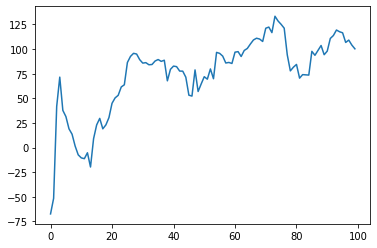

In [11]:
def run():
    env = gym.make('LunarLander-v2')
#     env = gym.make('CartPole-v0')

    agent = dqn.Agent(
        discount=0.99,
        softmax_temperature=1.0,
        
        greedy_epsilon_max=1.0,
        greedy_epsilon_decay=0.1,
        greedy_epsilon_min=1e-4,
        priority_epsilon=0,
        priority_alpha=0,
        
        store_size=1 << 20,
        n_steps=100000,
        target_update_interval=4000,
        n_steps_to_start_training=1000,
        
        log_interval=1000,
        demo_interval=50,
        
        learning_rate=5e-4,
        
        batch_size=1 << 8,
#         mini_batch_size=1 << 6,
        epochs=1, # descend iterations each batch
    )
    
    pprint.pprint(agent.__dict__)
    
    qnet, curve = dqn.learn(env, agent)
    
    plt.plot(curve)
    plt.show()
    
#     dqn.play(env, agent, qnet)
    
    env.close()
    return qnet, curve

qnet, curve = run()

In [12]:
env = gym.make('LunarLander-v2')
#     env = gym.make('CartPole-v0')

agent = dqn.Agent(
    discount=0.99,
    softmax_temperature=1.0,

    greedy_epsilon_max=1.0,
    greedy_epsilon_decay=0.1,
    greedy_epsilon_min=1e-4,
    priority_epsilon=0,
    priority_alpha=0,

    store_size=1 << 20,
    n_steps=80000,
    target_update_interval=4000,
    n_steps_to_start_training=1000,

    log_interval=1000,
    demo_interval=20,

    learning_rate=5e-4,

    batch_size=1 << 6,
#         mini_batch_size=1 << 6,
    epochs=1, # descend iterations each batch
)

In [22]:
dqn.play(env, agent, qnet, render=True)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 1, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 3, 3, 0, 0, 2, 2, 2, 3, 3, 2, 3, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 2, 3, 3, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 3, 1, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 3, 2, 1, 2, 2, 3, 2, 1, 2, 3, 2, 2, 2, 3, 2, 2, 1, 2, 3, 1, 2, 1, 2, 3, 1, 2, 3, 3, 1, 1, 2, 3, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 3, 3, 3, 0, 2, 2, 2, 3, 

271.48598316377377

In [28]:
from datetime import datetime
now = datetime.now().strftime("%Y-%m-%d-%H-%M")
torch.save(qnet.state_dict(), './models/LunarLander-v2-' + now)
print(now)

2020-05-28-02-07


In [2]:
qnet = nn.Sequential(
        nn.Linear(8, 128),
        nn.ReLU(),
        nn.Linear(128, 128),
        nn.ReLU(),
        nn.Linear(128, 4)
    )
qnet.load_state_dict(torch.load('./models/LunarLander-v2-' + '2020-05-28-02-07'))
qnet.eval()

NameError: name 'now' is not defined

In [31]:
dqn.play(env, agent, qnet, render=True)

[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 3, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 3, 2, 0, 2, 0, 2, 3, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 3, 2, 3, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 0, 2, 2, 1, 2, 1, 3, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 3, 3, 3, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 1, 3, 2, 2, 2, 2, 1, 2, 2, 0, 2, 0, 1, 2, 3, 2, 2, 2, 1, 2, 3, 2, 

199.70358688897878